# University Admission Prediction : Logistic Regression

## Introduction

The project will implement Logistic Regression + scipy to predict student's university admission status. The objective is to understand and create a Logistic Regression algorithm and utilize the advanced optimization algorithm in scipy. The dataset is obtained from the Exercise 2 of the CS229 - 2018 Harvard class. 

The project consists of the following sections,

| Section | Part                                            |Explanation                                    | 
|---------|:-                                               |:-                                             |
| 1       | [Review](#section1)                             | The equations which will be used to create the Logistic Regression Class |
| 2       | [Define Logistic Regression Class](#section2)                     | The class serves as a self-built LG algorithm|
| 3       | [University Admission Prediction with LG Class](#section3)     | Evaluate the LG model          |
| 4       | [Conclusion](#section4)     | Take aways of the project         |

<a id="section1"></a>
## 1:  Review 

Logistic regression uses a Sigmoid function to calculate the $h_{\theta}$,
$$ h_\theta(x) = g(\theta^T x)$$


which the $g$ is a sigmoid function. The sigmoid function is defined as, 

$$g(z) = \frac{1}{1+e^{-z}}$$

Moreover, the optimization objective `cost function` is,

$$ J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \left[ -y^{(i)} \log\left(h_\theta\left( x^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - h_\theta\left( x^{(i)} \right) \right) \right]$$

which the gradient of the cost function is,

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^m \left( h_\theta \left( x^{(i)} \right) - y^{(i)} \right) x_j^{(i)} $$

The project will utilize scipy.optimize.minimize algorithm to optimize the optimization objective rather than using Batch Gradient Descent. As usual, vectorization is also implemented to optimize the algorithm.

<a id="section2"></a>
## 2:  Define a Logistic Regression class 
The pipeline will be,

| Pipeline | Part               |Explanation                       | 
| ---------|:-                  |:-                                |
| 1        | Load the dataset   | Using Numpy                      |
| 2        | Plot the dataset   | Using Matplotlib pyplot          |
| 3        | Sigmoid            | To calculate the $h_{\theta}$    |
| 4        | Cost Function      | Refer to the [review](section1)  |
| 5        | Scipy Optimization | Advanced optimization algorithm (refer to [1](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#rdd2e1855725e-5) and [2](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#rdd2e1855725e-8)) |
| 6        | Prediction         | Given $\theta$, return status and its probability  |

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from scipy import optimize
%matplotlib inline

In [1]:
class LogisticRegression:
    def __init__(self):
        '''
        The method will load the dataset and initialize important value. 
        
        STEPS
        -----
        1. Loading dataset : Refer to the load_data method for details
        '''
        
        self.load_data()
        
    def load_data(self):
        '''
        The method will load the dataset from a CSV file named 'ex2data1.txt'. 
        Note: The raw dataset has been shuffled randomly before.
        
        STEPS
        -----
        1. Load the CSV file
        2. Assign the following variables,
            m : number of dataset examples
            n : number of dataset features that includes the bias term
        
        3. Assign features and labels,
            X : training set features,
                X[0] : 1st exam score
                X[1] : 2nd exam score
            y : university admission results. accepted (y=1), rejected (y=0).            
        '''
        
        # STEP 1
        self.dataset = np.loadtxt(os.path.join('Data', 'ex2data1.txt'), delimiter=',')
        
        # STEP 2
        self.m = self.dataset.shape[0]
        self.n = self.dataset.shape[1]
        
        # STEP 3
        self.X = self.dataset[:, :2]
        self.y = self.dataset[:, 2]
                
    def plot_data(self, X, y):
        '''
        The method will plot the dataset.
        
        PARAMETERS
        ----------
        X : Numpy array
            A matrix of shape (m, 2), containing 2 features for all examples.

        y : Numpy array
            A vector of shape (m, 1), containing all examples' labels
        
        STEPS
        -----
        1. Find indices that has label 1 (admitted) and 0 (rejected)
        2. Plot the data
        '''
        
        # STEP 1
        idx_admitted = y==1
        idx_rejected = y==0
        
        # STEP 2
        plt.plot(X[idx_admitted,0], X[idx_admitted,1], 'k*', mfc='b', ms=8, mec='b', mew=1)
        plt.plot(X[idx_rejected,0], X[idx_rejected,1], 'ko', mfc='r', ms=8, mec='r', mew=1)
        plt.xlabel('Exam 1 score')
        plt.ylabel('Exam 2 score')
        plt.legend(['Admitted', 'Not admitted'])
            
    def sigmoid(self, z):
        '''
        The method will calculate the sigmoid function.
        
        PARAMETERS
        ----------
        z : Numpy array
            A vector of shape (m, 1) from a matrix multiplication of theta and X
            
        RETURNS
        -------
        g : Numpy array
            A vector of shape (m,1) of h_theta
        '''
        
        g = 1 / (1 + np.exp(-z))
        
        return g
    
    def compute_cost(self, theta, X, y):
        '''
        The method will compute the cost and the gradient. The cost function 
        will be referred later for the scipy optimization algorithm.
        
        PARAMETERS
        ----------
        theta : Numpy array
               A vector of shape (n, 1), containing all thetas.
        X : Numpy array
            A matrix of shape (m, n), containing all examples' labels
            
        y : Numpy array
            A vector of shape (m, 1), containing all examples' labels
            
        RETURNS
        -------
        J : float
            Given the theta, return the cost of the model
        grad : Numpy array
            A vector of shape (n+1,1), containing the gradient of the model
            
        STEPS
        -----
        1. Calculate the sigmoid function
        2. Calculate the cost and gradient
        '''
        
        # STEP 1
        z = np.dot(X,theta)
        h_theta = self.sigmoid(z)
        
        # STEP 2
        J = (1/self.m) * np.sum(np.dot(-y, np.log(h_theta)) - np.dot((1-y), np.log(1-h_theta)))
        grad = (1/self.m) * np.dot((h_theta - y), X)
        
        return J, grad

    def scipy_optimize(self, maxiter):
        '''
        The method will utilize Truncated Newton algorithm (TNC) in the Scipy Optimization. 
        Please refer to the Review section.
        
        PARAMETERS
        ----------
        maxiter : integer
               Define maximum iterations allowed for the TNC.
               
        RETURNS
        -------
        theta : Numpy array
            A vector of shape (n, 1), containing optimized thetas
            from TNC
            
        STEPS
        -----
        1. Add bias unit to the features
        2. Define the initial theta as a vector of zeros
        3. Scipy optimization
        '''
        
        # STEP 1
        bias_unit = np.ones((self.X.shape[0],1))
        X_with_bias = np.hstack((bias_unit,self.X))
        
        # STEP 2
        self.theta = np.zeros(X_with_bias.shape[1])
        initial_theta = self.theta.copy()
        
        
        # STEP 3
        options = {'maxiter' : maxiter}

        res = optimize.minimize(self.compute_cost,
                                initial_theta,
                                (X_with_bias, self.y),
                                jac=True,
                                method='TNC',
                                options=options)
        
        cost = res.fun
        theta = res.x
        
        return theta
    
    def plot_decision_boundary(self, theta, X, y):
        '''
        The method will plot plot the decision boundary. This method is 
        a code snipet from the Andrew Ng training exercise.
        
        PARAMETERS
        ----------
        theta : Numpy array
               A vector of shape (n, 1), containing all thetas.
        X : Numpy array
            A matrix of shape (m, n), containing all examples' labels
        y : Numpy array
            A vector of shape (m, 1), containing all examples' labels
        '''
        
        # make sure theta is a numpy array
        theta = np.array(theta)

        # Add bias term
        bias_unit = np.ones((X.shape[0],1))
        X = np.hstack((bias_unit,X))
        
        # Plot Data (remember first column in X is the intercept)
        self.plot_data(X[:, 1:3], y)

        if X.shape[1] <= 3:
            # Only need 2 points to define a line, so choose two endpoints
            plot_x = np.array([np.min(X[:, 1]) - 2, np.max(X[:, 1]) + 2])

            # Calculate the decision boundary line
            plot_y = (-1. / theta[2]) * (theta[1] * plot_x + theta[0])

            # Plot, and adjust axes for better viewing
            plt.plot(plot_x, plot_y, 'g')

            # Legend, specific for the exercise
            plt.legend(['Admitted', 'Not admitted', 'Decision Boundary'], 
                       loc = 'upper right', bbox_to_anchor=(0.45, 0., 1, 1))
            plt.xlim([30, 100])
            plt.ylim([30, 100])
        else:
            # Here is the grid range
            u = np.linspace(-1, 1.5, 50)
            v = np.linspace(-1, 1.5, 50)

            z = np.zeros((u.size, v.size))
            # Evaluate z = theta*x over the grid
            for i, ui in enumerate(u):
                for j, vj in enumerate(v):
                    z[i, j] = np.dot(mapFeature(ui, vj), theta)

            z = z.T  # important to transpose z before calling contour
            # print(z)

            # Plot z = 0
            plt.contour(u, v, z, levels=[0], linewidths=2, colors='g')
            plt.contourf(u, v, z, levels=[np.min(z), 0, np.max(z)], cmap='Greens', alpha=0.4)

    
    def predict(self, X, theta):
        '''
        The method will predict the admission status given the X and thetas.
        Moreover, calculate the predictions' probability.
        
        PARAMETERS
        ----------
        X : Numpy array
            A matrix of shape (m, n-1), containing all examples features'
            values
        theta : Numpy array
            A vector of shape (n, 1), containing all thetas.
            
        RETURNS
        -------
        probability : Numpy array
                    A vector of shape (m, 1), containing the admission_status
                    probability
        admission_status : Numpy array
                        A vector of shape (m,1), containing the prediction of
                        the admission_status (1 = accepted, 0 = rejected)
                        
        STEPS
        -----
        1. Add bias unit to the features
        2. Calculate the sigmoid function
        3. Find indices of accepted (y>= 0.5) and rejected (y<0.5)
        4. Assign the prediction based on the probability threshold (0.5)
        '''
        
        # STEP 1
        bias_unit = np.ones((X.shape[0],1))
        X_with_bias = np.hstack((bias_unit,X))

        # STEP 2
        z = np.dot(X_with_bias,theta)
        probability = self.sigmoid(z)
        
        # STEP 3
        idx_positive = np.argwhere(probability >= 0.5)
        idx_negative = np.argwhere(probability < 0.5)
        
        # STEP 4
        admission_status = np.zeros(X.shape[0])
        admission_status[idx_positive] = 1
        admission_status[idx_negative] = 0
        
        return probability, admission_status

<a id="section3"></a>
## 3:  Predict University Admission Status with Logistic Regression class 
In section 3, we will predict the university admission's status using the Logistic Regression class on Section 2.

The dataset has 2 features:
1. Exam score 1
2. Exam score 2

In [3]:
university_admission = LogisticRegression()
X = university_admission.X.copy()
y = university_admission.y.copy()

In [4]:
print('{:>8s}{:>9s}{:>9s}'.format('Score1', 'Score2', 'status'))
print('-'*26)
for i in range(10):
    print('{:6.0f}{:9.0f}{:9.0f}'.format(X[i, 0], X[i, 1], y[i]))

  Score1   Score2   status
--------------------------
    35       78        0
    30       44        0
    36       73        0
    60       86        1
    79       75        1
    45       56        0
    61       97        1
    75       47        1
    76       87        1
    84       44        1


The training set is illustrated below,

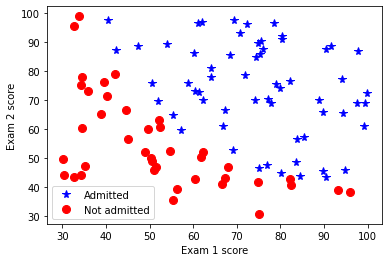

In [5]:
university_admission.plot_data(X,y)
plt.show()

It seems features mapping is not necessary since the admission status easily distinguished by a linear line.

The `scipy_optimize` is then called to begin the optimization,

In [6]:
theta = university_admission.scipy_optimize(400)

The `scipy_optimize` return the `theta` with the lowest cost. Let's evaluate the model accuracy,

In [7]:
_, admission_status = university_admission.predict(X,theta)

print('Model Accuracy: {:.2f} %'.format(np.mean(admission_status == y) * 100))

Model Accuracy: 89.00 %


The model has the accuracy of **89%** to classify the `admission_status`. Moreover, let's plot the `decision boundary` to have intuition how good the model is,

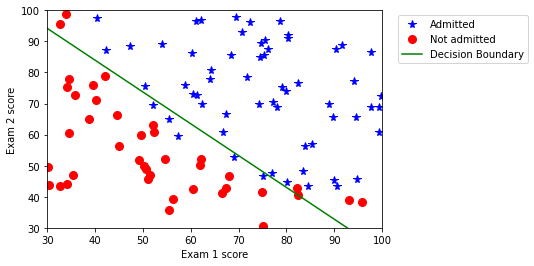

In [8]:
university_admission.plot_decision_boundary(theta, X, y)

The decision boundary seems able to distinguish the admission status.

<a id="section4"></a>
## 3:  Conclusion
In this project, we have successfully developed a Machine Learning algorithm using Logistic Regression and Scipy Optimization. The algorithm is proven able to produce a good hypothesis $h_{\theta}(x)$ given a very limited number of training examples. For a complex training set, features mapping might be necessary.